<a href="https://colab.research.google.com/github/Haarini/Fashion-MNIST-Classification/blob/master/CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

Exploring the data

In [24]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


Preprocessing the data. 

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

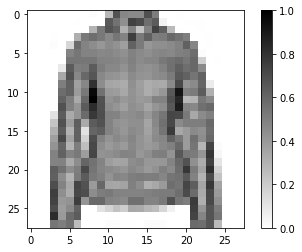

In [26]:
for image,label in test_dataset.take(1):
  break
image=image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.show()

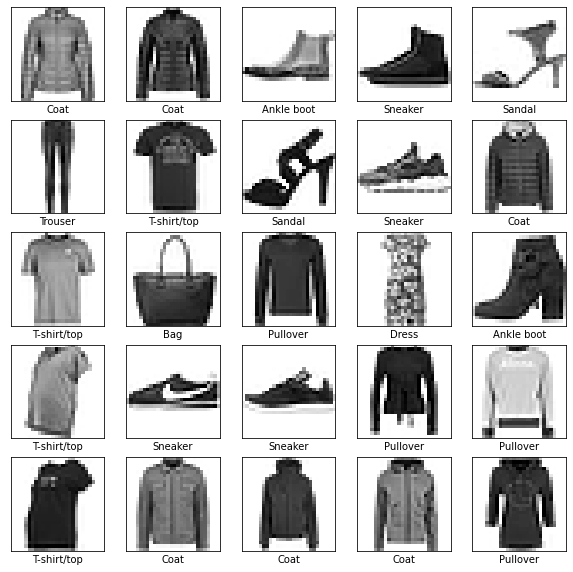

In [27]:
plt.figure(figsize=(10,10))
i=0
for(image,label) in test_dataset.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

#Building the CNN Model

This Convolutional Neural Network is build with 2 convolution layers, 2 maxpooling layers, 1 flatten layer, and 2 dense layers at the end.

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)



In [32]:
model.fit(train_dataset, epochs=25, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/25
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3860 - accuracy: 0.8614
Epoch 2/25
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2538 - accuracy: 0.9067
Epoch 3/25
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2071 - accuracy: 0.9242
Epoch 4/25
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1781 - accuracy: 0.9348
Epoch 5/25
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1513 - accuracy: 0.9447
Epoch 6/25
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1281 - accuracy: 0.9517
Epoch 7/25
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1069 - accuracy: 0.9610
Epoch 8/25
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0892 - accuracy: 0.9671
Epoch 9/25
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0776 - accuracy: 0.9708
Epoch 10/25
1875/1875 [==============================] - 69s 37m

Evaluate Accuracy on Train and Test Dataset



In [33]:
train_loss,train_accuracy=model.evaluate(train_dataset,steps=math.ceil(num_train_examples/32))
print('Accuracy on Train Dataset',train_accuracy)
test_loss, test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print('Accuracy on Test Datset:',test_accuracy)

1875/1875 [==============================] - 20s 11ms/step - loss: 0.0126 - accuracy: 0.9956
Accuracy on Train Dataset 0.9955666661262512
313/313 [==============================] - 5s 16ms/step - loss: 0.7120 - accuracy: 0.9190
Accuracy on Test Datset: 0.9190000295639038


Predictions and Exploring the model

In [34]:
for test_images, test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

predictions.shape

(32, 10)

In [35]:
predictions[0]

array([-29.125069 , -16.475025 ,  -1.5745925, -24.845211 ,  13.304529 ,
       -25.087732 ,   5.762165 , -18.309132 ,  -9.21395  , -10.638481 ],
      dtype=float32)

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

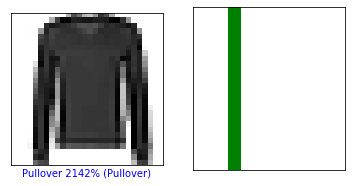

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

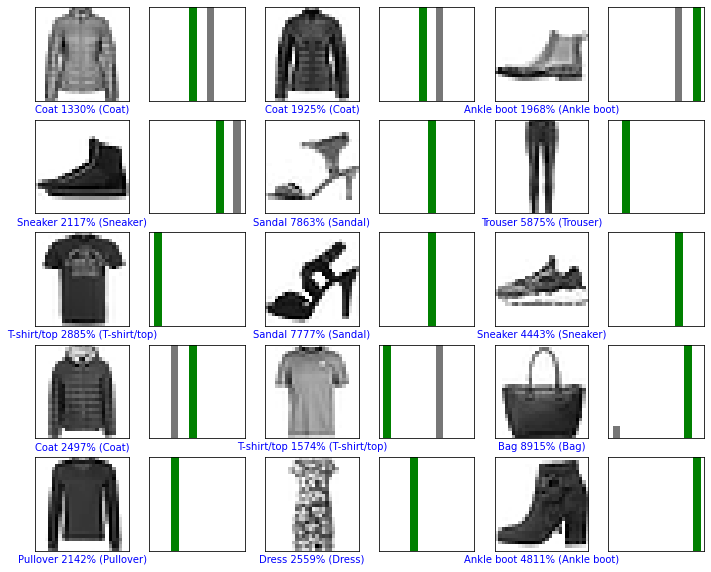

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Using the trained CNN model to make a prediction for a single image

In [41]:
img=test_images[0]
#Adding the list to an array
img=np.array([img])
print(img.shape)
#Predicting the image
predictions_single=model.predict(img)
print(predictions_single)

(1, 28, 28, 1)
[[-29.12507   -16.475027   -1.5745938 -24.845215   13.304529  -25.087734
    5.762168  -18.30914    -9.213952  -10.638485 ]]


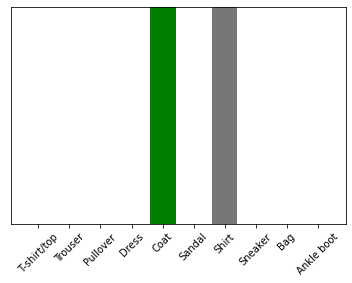

In [42]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)